# Summary Statistics, EDA, and Regression Analysis

In [1]:
#Import Python Packages/Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from pandas.plotting import table
from tabulate import tabulate

In [2]:
#Load data
data = pd.read_csv('Data/stata_data.csv')
data.head()

,Unnamed: 0,CI,ISF,NASDAQ,NYSE,Other,one_m_diff_volume,three_m_diff_volume,six_m_diff_volume,one_y_diff_volume,...,three_m_diff_shareprice,six_m_diff_shareprice,one_y_diff_shareprice,Sharing Firm Introduced,Relatedness with Sharing Firm,Date_End(t=1),Date_End(t=12),Date_End(t=3),Date_End(t=6),Exchange
0,2,1,0,1,0,0,-27.602686,-28.601259,-12.906301,63.017803,...,-14.281478,-17.272690,-36.492656,No,Closely Related,2008-08-31 00:00:00,2008-08-31 00:00:00,2008-08-31 00:00:00,2008-08-31 00:00:00,NASDAQ
1,3,1,1,1,0,0,219.559358,-45.717575,150.587447,12.873300,...,-40.482228,-49.805155,-14.643252,Yes,Closely Related,2008-09-30 00:00:00,2009-08-31 00:00:00,2008-11-30 00:00:00,2009-02-28 00:00:00,NASDAQ
2,0,0,0,0,1,0,-28.898357,23.709987,25.032663,43.315739,...,-31.725230,-43.085234,-52.447342,No,Less Closely Related,2008-08-31 00:00:00,2008-08-31 00:00:00,2008-08-31 00:00:00,2008-08-31 00:00:00,NYSE
3,1,0,1,0,1,0,-19.983171,247.877317,696.647198,544.352247,...,-89.095128,-95.190888,-69.921957,Yes,Less Closely Related,2008-09-30 00:00:00,2009-08-31 00:00:00,2008-11-30 00:00:00,2009-02-28 00:00:00,NYSE
4,6,1,0,0,0,1,-96.741663,-94.926790,-98.501300,-94.113737,...,-17.569188,-20.093245,-33.146868,No,Closely Related,2017-09-30 00:00:00,2017-09-30 00:00:00,2017-09-30 00:00:00,2017-09-30 00:00:00,Other


In [3]:
#Create New Dataframes with Variables for Each Time Period
onemonthdata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'one_m_diff_volume', 'one_m_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]
threemonthdata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'three_m_diff_volume', 'three_m_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]
sixmonthdata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'six_m_diff_volume', 'six_m_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]
oneyeardata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'one_y_diff_volume', 'one_y_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]

## Descriptive Statistics Tables

In [4]:
#Crpsstab of Categorical Variable Counts
catsummstats = pd.crosstab(data['Exchange'],[data['Sharing Firm Introduced'],data['Relatedness with Sharing Firm']],margins=True, margins_name= "Total")
catsummstats

Sharing Firm Introduced                    No                       \
Relatedness with Sharing Firm Closely Related Less Closely Related   
Exchange                                                             
NASDAQ                                      8                    7   
NYSE                                       21                   22   
Other                                       4                    4   
Total                                      33                   33   

Sharing Firm Introduced                   Yes                      Total  
Relatedness with Sharing Firm Closely Related Less Closely Related        
Exchange                                                                  
NASDAQ                                      8                    7    30  
NYSE                                       21                   22    86  
Other                                       4                    4    16  
Total                                      33                   33   132

In [5]:
#Descriptive Statistics for % Change in Share Price and Volume at t = (1,3,6,12)
summstats = data[['one_m_diff_shareprice','three_m_diff_shareprice','six_m_diff_shareprice','one_y_diff_shareprice','one_m_diff_volume','three_m_diff_volume','six_m_diff_volume','one_y_diff_volume']].describe().transpose()
summstats

,count,mean,std,min,25%,50%,75%,max
one_m_diff_shareprice,132.0,0.449868,8.096651,-23.834634,-3.223217,0.656898,5.624116,24.101449
three_m_diff_shareprice,132.0,1.041453,17.947686,-89.095128,-6.988834,1.816616,12.855617,53.285290
six_m_diff_shareprice,132.0,6.738862,27.600990,-95.190888,-7.042494,7.548548,16.380691,161.231884
one_y_diff_shareprice,132.0,19.987007,44.165397,-83.622947,-5.269409,17.584222,39.094520,207.948924
one_m_diff_volume,132.0,60.818025,180.352142,-96.741663,-37.161616,-2.535607,86.802497,1042.660212
three_m_diff_volume,132.0,46.839914,172.425336,-94.926790,-45.059206,3.452321,65.107916,1400.809741
six_m_diff_volume,132.0,39.549506,143.726748,-98.501300,-44.744742,-2.116578,79.594662,783.292137
one_y_diff_volume,132.0,52.045339,185.541864,-94.113737,-33.637500,4.991132,66.333246,1776.468798


## EDA Plots

In [6]:
sns.set(context='paper', style='ticks',
rc={'font.family': 'sans-serif',
 'font.sans-serif':
  'sans-serif',
 'axes.spines.right': False,
 'axes.spines.top': False})


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


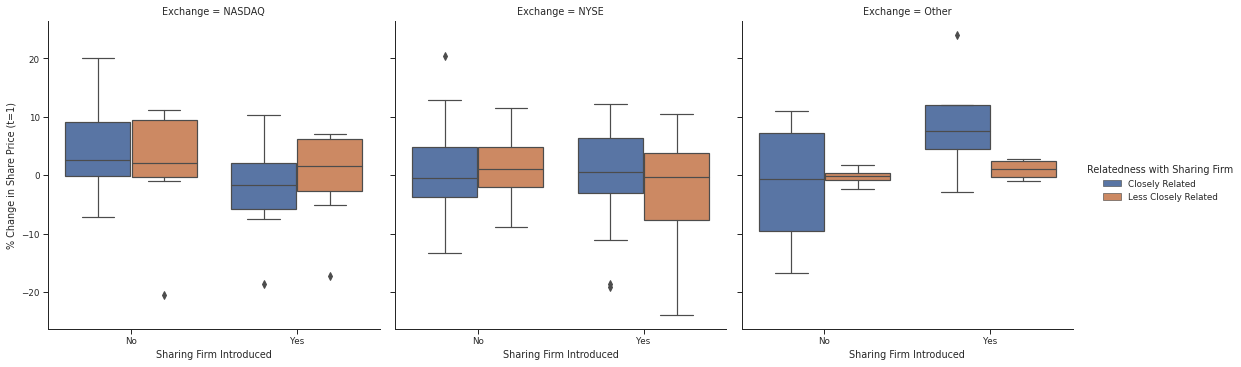

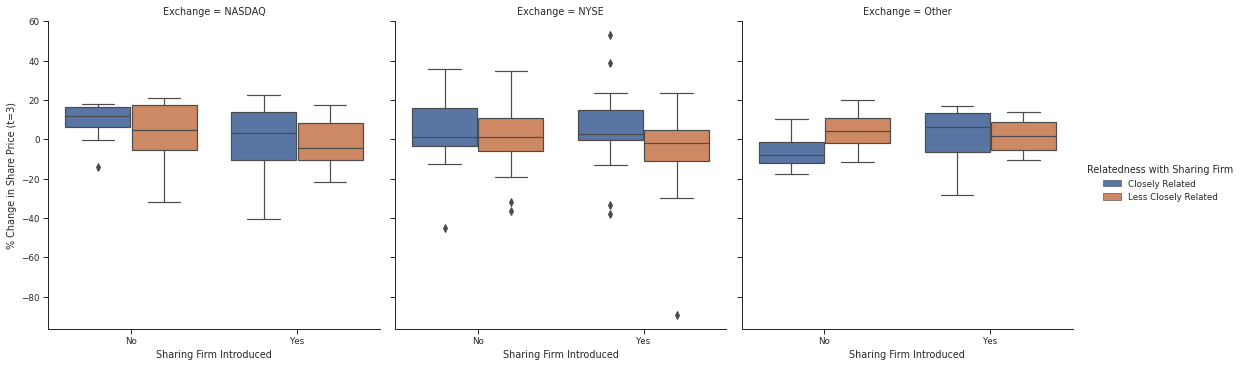

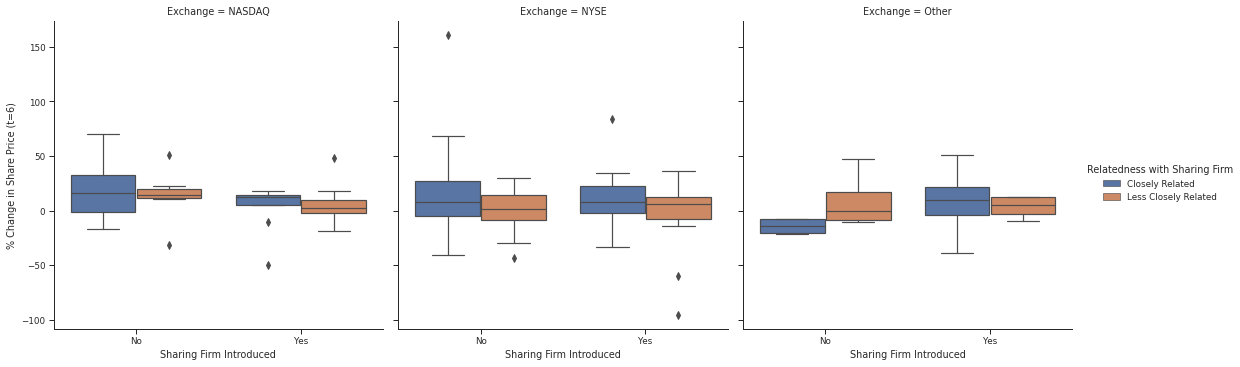

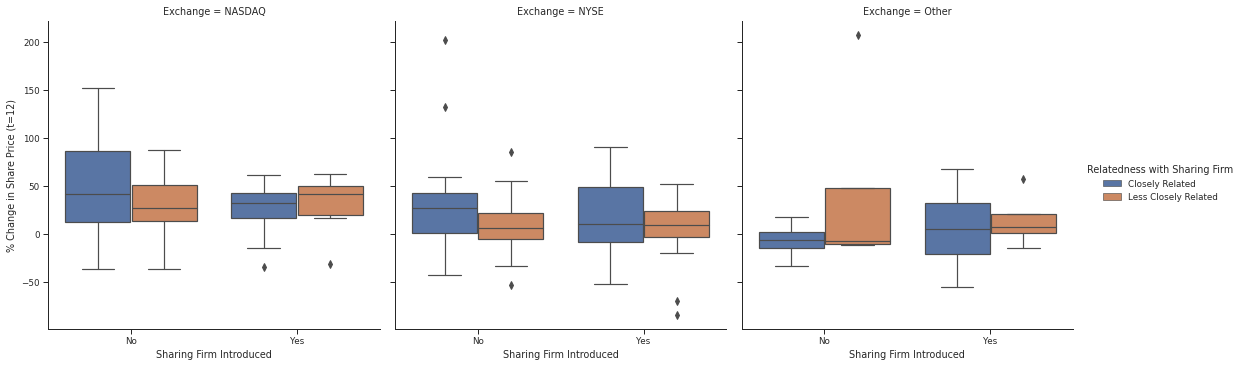

In [7]:
#Boxplots of the Categorical Data for Each Time Period
CATsvsOneM = sns.catplot(x="Sharing Firm Introduced", y="one_m_diff_shareprice",hue='Relatedness with Sharing Firm',col='Exchange', kind='box',data=onemonthdata)
CATsvsOneM.set_ylabels('% Change in Share Price (t=1)')
#CATsvsOneM.fig.suptitle('Figure 3. one_m_diff_shareprice vs. Categorical Variables', weight='bold',y=1.05,x=.15)
CATsvsOneM.savefig("Regression Output:Visualizations/EDA Plots/BoxplotsofSharePricevsCats/onemonthcats.png")
plt.show()

CATsvsThreeM = sns.catplot(x="Sharing Firm Introduced", y="three_m_diff_shareprice",hue='Relatedness with Sharing Firm',col='Exchange',kind='box',data=threemonthdata)
CATsvsThreeM.set_ylabels('% Change in Share Price (t=3)')
#CATsvsThreeM.fig.suptitle('Figure 4. three_m_diff_shareprice vs. Categorical Variables', weight='bold',y=1.05,x=.15)
CATsvsThreeM.savefig("Regression Output:Visualizations/EDA Plots/BoxplotsofSharePricevsCats/threemonthcats.png")
plt.show()

CATsvsSixM = sns.catplot(x="Sharing Firm Introduced", y="six_m_diff_shareprice",hue='Relatedness with Sharing Firm',col='Exchange', kind='box',data=sixmonthdata)
CATsvsSixM.set_ylabels('% Change in Share Price (t=6)')
#CATsvsSixM.fig.suptitle('Figure 5. six_m_diff_shareprice vs. Categorical Variables', weight='bold',y=1.05,x=.15)
CATsvsSixM.savefig("Regression Output:Visualizations/EDA Plots/BoxplotsofSharePricevsCats/sixmonthcats.png")
plt.show()

CATsvsOneY = sns.catplot(x="Sharing Firm Introduced", y="one_y_diff_shareprice",hue='Relatedness with Sharing Firm',col='Exchange', kind='box',data=oneyeardata)
CATsvsOneY.set_ylabels('% Change in Share Price (t=12)')
#CATsvsOneY.fig.suptitle('Figure 6. one_y_diff_shareprice vs. Categorical Variables', weight='bold',y=1.05,x=.15)
CATsvsOneY.savefig("Regression Output:Visualizations/EDA Plots/BoxplotsofSharePricevsCats/oneyearcats.png")
plt.show()

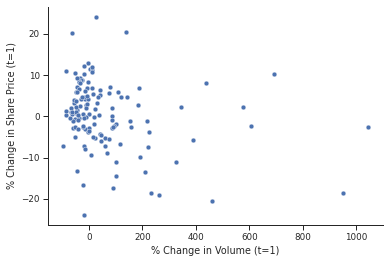

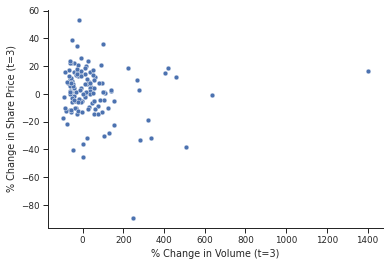

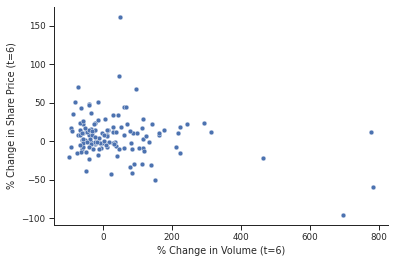

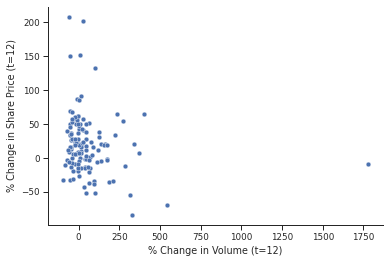

In [8]:
#Scatterplots of Share Price vs Volume
#Potentially plot change in share price overtime. Will need to extract dates of observation during data cleanup
VolumevsOneM = sns.scatterplot(x="one_m_diff_volume", y="one_m_diff_shareprice",data=onemonthdata)#.set_title('Figure 7. one_m_diff_shareprice vs. one_m_diff_volume',loc='left',fontdict={'fontweight':'bold'})
VolumevsOneM.set_ylabel('% Change in Share Price (t=1)')
VolumevsOneM.set_xlabel('% Change in Volume (t=1)')
VolumevsOneM.figure.savefig("Regression Output:Visualizations/EDA Plots/ScatterplotsofSharePricevsVolume/onemonthvolume.png")
plt.show()

VolumevsThreeM = sns.scatterplot(x="three_m_diff_volume", y="three_m_diff_shareprice",data=threemonthdata)#.set_title('Figure 8. three_m_diff_shareprice vs. three_m_diff_volume',loc='left',fontdict={'fontweight':'bold'})
VolumevsThreeM.set_ylabel('% Change in Share Price (t=3)')
VolumevsThreeM.set_xlabel('% Change in Volume (t=3)')
VolumevsThreeM.figure.savefig("Regression Output:Visualizations/EDA Plots/ScatterplotsofSharePricevsVolume/threemonthvolume.png")
plt.show()

VolumevsSixM = sns.scatterplot(x="six_m_diff_volume", y="six_m_diff_shareprice",data=sixmonthdata)#.set_title('Figure 9. six_m_diff_shareprice vs. six_m_diff_volume',loc='left',fontdict={'fontweight':'bold'})
VolumevsSixM.set_ylabel('% Change in Share Price (t=6)')
VolumevsSixM.set_xlabel('% Change in Volume (t=6)')
VolumevsSixM.figure.savefig("Regression Output:Visualizations/EDA Plots/ScatterplotsofSharePricevsVolume/sixmonthvolume.png")
plt.show()

VolumevsOneY = sns.scatterplot(x="one_y_diff_volume", y="one_y_diff_shareprice",data=oneyeardata)#.set_title('Figure 10. one_y_diff_shareprice vs. one_y_diff_volume',loc='left',fontdict={'fontweight':'bold'})
VolumevsOneY.set_ylabel('% Change in Share Price (t=12)')
VolumevsOneY.set_xlabel('% Change in Volume (t=12)')
VolumevsOneY.figure.savefig("Regression Output:Visualizations/EDA Plots/ScatterplotsofSharePricevsVolume/oneyearvolume.png")
plt.show()

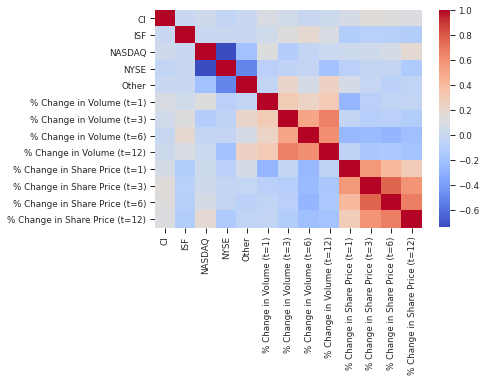

In [9]:
#Heatmap of Data
HeatMap = sns.heatmap(data.loc[:,'CI':'one_y_diff_shareprice'].corr(),annot=False,cmap='coolwarm')#.set_title("Figure 11. Correlation Matrix/Heat Map",loc='left',fontdict={'fontweight':'bold'})
HeatMap.set_xticklabels(['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other',
       '% Change in Volume (t=1)', '% Change in Volume (t=3)', '% Change in Volume (t=6)',
       '% Change in Volume (t=12)', '% Change in Share Price (t=1)', '% Change in Share Price (t=3)',
       '% Change in Share Price (t=6)', '% Change in Share Price (t=12)'])
HeatMap.set_yticklabels(['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other',
       '% Change in Volume (t=1)', '% Change in Volume (t=3)', '% Change in Volume (t=6)',
       '% Change in Volume (t=12)', '% Change in Share Price (t=1)', '% Change in Share Price (t=3)',
       '% Change in Share Price (t=6)', '% Change in Share Price (t=12)'])
HeatMap.figure.savefig("Regression Output:Visualizations/EDA Plots/Heatmap/heatmap.png",bbox_inches='tight')
plt.show()

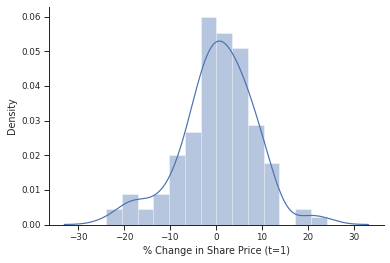

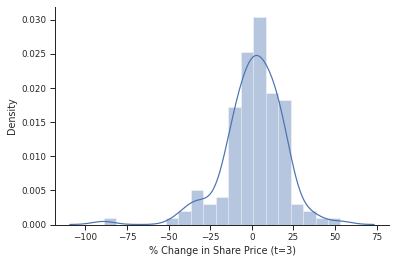

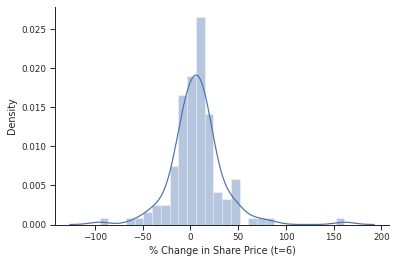

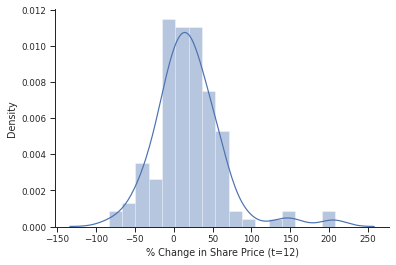

In [10]:
#Distributions of % Change in Share Price
OneMDistofSharePriceDiff = sns.distplot(onemonthdata['one_m_diff_shareprice'])#.set_title("Figure 12. KDE of one_m_diff_shareprice",loc='left',fontdict={'fontweight':'bold'})
OneMDistofSharePriceDiff.set_xlabel('% Change in Share Price (t=1)')
OneMDistofSharePriceDiff.figure.savefig("Regression Output:Visualizations/EDA Plots/SharePriceKDEs/onemonthkde.png")
plt.show()

ThreeMDistofSharePriceDiff = sns.distplot(threemonthdata['three_m_diff_shareprice'])#.set_title("Figure 13. KDE of three_m_diff_shareprice",loc='left',fontdict={'fontweight':'bold'})
ThreeMDistofSharePriceDiff.set_xlabel('% Change in Share Price (t=3)')
ThreeMDistofSharePriceDiff.figure.savefig("Regression Output:Visualizations/EDA Plots/SharePriceKDEs/threemonthkde.png")
plt.show()

SixMDistofSharePriceDiff = sns.distplot(sixmonthdata['six_m_diff_shareprice'])#.set_title("Figure 14. KDE of six_m_diff_shareprice",loc='left',fontdict={'fontweight':'bold'})
SixMDistofSharePriceDiff.set_xlabel('% Change in Share Price (t=6)')
SixMDistofSharePriceDiff.figure.savefig("Regression Output:Visualizations/EDA Plots/SharePriceKDEs/sixmonthkde.png")
plt.show()

OneYDistofSharePriceDiff = sns.distplot(oneyeardata['one_y_diff_shareprice'])#.set_title("Figure 15. KDE of one_y_diff_shareprice",loc='left',fontdict={'fontweight':'bold'})
OneYDistofSharePriceDiff.set_xlabel('% Change in Share Price (t=12)')
OneYDistofSharePriceDiff.figure.savefig("Regression Output:Visualizations/EDA Plots/SharePriceKDEs/oneyearkde.png")
plt.show()

## Regression Analysis for t = One Month
Note: The Residual and Q-Q Plots for all the regressions were done in STATA

In [11]:
onemresult1 = sm.ols(formula="one_m_diff_shareprice ~ ISF + CI", data=onemonthdata).fit(cov_type='HC1')
onemresult2 = sm.ols(formula="one_m_diff_shareprice ~ ISF + CI + one_m_diff_volume", data=onemonthdata).fit(cov_type='HC1')
onemresult3 = sm.ols(formula="one_m_diff_shareprice ~ ISF + CI + one_m_diff_volume + NASDAQ + NYSE", data=onemonthdata).fit(cov_type='HC1')
onemresult4 = sm.ols(formula="one_m_diff_shareprice ~ ISF + CI + one_m_diff_volume + NASDAQ + NYSE + ISF:CI + ISF:one_m_diff_volume + ISF:NASDAQ + ISF:NYSE", data=onemonthdata).fit(cov_type='HC1')

onemonthsummary = Stargazer([onemresult1, onemresult2, onemresult3, onemresult4])
onemonthsummary.covariate_order(['Intercept', 'ISF', 'CI', 'one_m_diff_volume','NASDAQ','NYSE','ISF:CI','ISF:one_m_diff_volume','ISF:NASDAQ','ISF:NYSE'])
onemonthsummary.add_custom_notes(['[1] Standard Errors are heteroscedasticity robust (HC1)'])
onemonthsummary.title("Table 5. Regression Output for t = One Month")

file = open("Regression Output:Visualizations/Regression Output/Python/onemonthoutput.html","w")
file.write(onemonthsummary.render_html())
file.close()
onemonthsummary

## Regression Analysis for t = Three Months

In [12]:
threemresult1 = sm.ols(formula="three_m_diff_shareprice ~ ISF + CI", data=threemonthdata).fit(cov_type='HC1')
threemresult2 = sm.ols(formula="three_m_diff_shareprice ~ ISF + CI + three_m_diff_volume", data=threemonthdata).fit(cov_type='HC1')
threemresult3 = sm.ols(formula="three_m_diff_shareprice ~ ISF + CI + three_m_diff_volume + NASDAQ + NYSE", data=threemonthdata).fit(cov_type='HC1')
threemresult4 = sm.ols(formula="three_m_diff_shareprice ~ ISF + CI + three_m_diff_volume + NASDAQ + NYSE + ISF:CI + ISF:three_m_diff_volume + ISF:NASDAQ + ISF:NYSE", data=threemonthdata).fit(cov_type='HC1')

threemonthsummary = Stargazer([threemresult1, threemresult2, threemresult3, threemresult4])
threemonthsummary.covariate_order(['Intercept', 'ISF', 'CI', 'three_m_diff_volume','NASDAQ','NYSE','ISF:CI','ISF:three_m_diff_volume','ISF:NASDAQ','ISF:NYSE'])
threemonthsummary.add_custom_notes(['[1] Standard Errors are heteroscedasticity robust (HC1)'])
threemonthsummary.title("Table 6. Regression Output for t = Three Months")

file = open("Regression Output:Visualizations/Regression Output/Python/threemonthoutput.html","w")
file.write(threemonthsummary.render_html())
file.close()
threemonthsummary

## Regression Analysis for t = Six Months

In [13]:
sixmresult1 = sm.ols(formula="six_m_diff_shareprice ~ ISF + CI", data=sixmonthdata).fit(cov_type='HC1')
sixmresult2 = sm.ols(formula="six_m_diff_shareprice ~ ISF + CI + six_m_diff_volume", data=sixmonthdata).fit(cov_type='HC1')
sixmresult3 = sm.ols(formula="six_m_diff_shareprice ~ ISF + CI + six_m_diff_volume + NASDAQ + NYSE", data=sixmonthdata).fit(cov_type='HC1')
sixmresult4 = sm.ols(formula="six_m_diff_shareprice ~ ISF + CI + six_m_diff_volume + NASDAQ + NYSE + ISF:CI + ISF:six_m_diff_volume + ISF:NASDAQ + ISF:NYSE", data=sixmonthdata).fit(cov_type='HC1')

sixmonthsummary = Stargazer([sixmresult1, sixmresult2, sixmresult3, sixmresult4])
sixmonthsummary.covariate_order(['Intercept', 'ISF', 'CI', 'six_m_diff_volume','NASDAQ','NYSE','ISF:CI','ISF:six_m_diff_volume','ISF:NASDAQ','ISF:NYSE'])
sixmonthsummary.add_custom_notes(['[1] Standard Errors are heteroscedasticity robust (HC1)'])
sixmonthsummary.title("Table 7. Regression Output for t = Six Months")

file = open("Regression Output:Visualizations/Regression Output/Python/sixmonthoutput.html","w")
file.write(sixmonthsummary.render_html())
file.close()
sixmonthsummary

## Regression Analysis for t = One Year

In [14]:
oneyresult1 = sm.ols(formula="one_y_diff_shareprice ~ ISF + CI", data=oneyeardata).fit(cov_type='HC1')
oneyresult2 = sm.ols(formula="one_y_diff_shareprice ~ ISF + CI + NASDAQ + NYSE", data=oneyeardata).fit(cov_type='HC1')
oneyresult3 = sm.ols(formula="one_y_diff_shareprice ~ ISF + CI + NASDAQ + NYSE + one_y_diff_volume", data=oneyeardata).fit(cov_type='HC1')
oneyresult4 = sm.ols(formula="one_y_diff_shareprice ~ ISF + CI + one_y_diff_volume + NASDAQ + NYSE + ISF:CI + ISF:one_y_diff_volume + ISF:NASDAQ + ISF:NYSE", data=oneyeardata).fit(cov_type='HC1')

oneyearsummary = Stargazer([oneyresult1, oneyresult2, oneyresult3, oneyresult4])
oneyearsummary.covariate_order(['Intercept', 'ISF', 'CI', 'one_y_diff_volume','NASDAQ','NYSE','ISF:CI','ISF:one_y_diff_volume','ISF:NASDAQ','ISF:NYSE'])
oneyearsummary.add_custom_notes(['[1] Standard Errors are heteroscedasticity robust (HC1)'])
oneyearsummary.title("Table 8. Regression Output for t = One Year")

file = open("Regression Output:Visualizations/Regression Output/Python/oneyearoutput.html","w")
file.write(oneyearsummary.render_html())
file.close()
oneyearsummary